In [131]:
import numpy as np
import cv2
from skimage import data, io, filters
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

300
[[153 150 160 ...  91  78 103]
 [186 154 161 ... 117 109  81]
 [197 177 161 ... 144  97 103]
 ...
 [128 129 128 ... 145 135 148]
 [127 128 128 ... 154 152 147]
 [124 127 129 ... 140 140 135]]


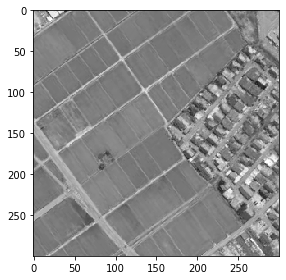

In [88]:
img = cv2.imread('.\\satelite\\P1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(img_gray)
print(len(img))
print(img_gray)

In [112]:
def creaVentanas(img, ventanas):
    ventanas = np.sqrt(ventanas)
    if (len(img) % ventanas == 0):
        aux = np.asarray(np.hsplit(img, ventanas), dtype = int)
        auxF = []
        
        for i in range(len(aux)):
            mAux = np.vsplit(aux[i], ventanas)
            for j in range(len(mAux)):
                auxF.append(mAux[i])
                
            
        auxF = np.asarray(auxF, dtype=int)
        return auxF
    else:
        print("Número de ventanas no válido")
        
def getInfoVentana(arrayVentanas, distancia, angulo, info1):
    auxInfo1 = []
    auxInfo2 = []
    for i in range(len(arrayVentanas)):
        glcm = greycomatrix(arrayVentanas[i], distancia, angulo, 256, symmetric=True, normed=True)
        auxInfo1.append(greycoprops(glcm, info1))
        #auxInfo2.append(greycoprops(glcm, info2))
        #auxInfo1[i] = greycoprops(glcm, info1)
        #auxInfo2[i] = greycoprops(glcm, info2)
        
        
    return auxInfo1


Tenemos:  25 ventanas
<class 'numpy.ndarray'>


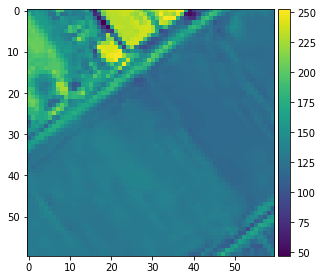

In [113]:
ventanas = creaVentanas(img_gray, 25)
print("Tenemos: ", ventanas.shape[0], "ventanas")
print(type(ventanas))
io.imshow(ventanas[0])

In [123]:
distancia = [1]
angulo = [0] #0 -> Oeste a este, #-np.pi/2 -> Sur a norte
informacion = ['energy']

arrayInfo = np.asarray(getInfoVentana(ventanas, distancia, angulo, informacion[0]), dtype=float).reshape((25,1))
#arrayInfo = getInfoVentana(ventanas, distancia, angulo, informacion[0])
resultado = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
print(arrayInfo)
print(resultado)

[[0.06680388]
 [0.06680388]
 [0.06680388]
 [0.06680388]
 [0.06680388]
 [0.07993402]
 [0.07993402]
 [0.07993402]
 [0.07993402]
 [0.07993402]
 [0.07095739]
 [0.07095739]
 [0.07095739]
 [0.07095739]
 [0.07095739]
 [0.03657347]
 [0.03657347]
 [0.03657347]
 [0.03657347]
 [0.03657347]
 [0.01844721]
 [0.01844721]
 [0.01844721]
 [0.01844721]
 [0.01844721]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [124]:
X = arrayInfo #X SON LOS DATOS DE ENTRENAMIENTO
Y = resultado  #Y SON LOS DATOS OBJETIVO

#VECTORES TEST Y VECTORES DE ENTRENAMIENTO, COMIENZA ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

#IMPRIMIMOS EL VECTOR DE TEST QUE SALE
print(X_test)

[[0.07095739]
 [0.07993402]
 [0.03657347]
 [0.01844721]
 [0.03657347]
 [0.06680388]
 [0.01844721]
 [0.06680388]]


## KNN

In [125]:
# CREAMOS EL CLASIFICADOR 
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [126]:
#PROBAMOS EL CLASIFICADOR CON EL VECTOR TEST QUE SE IMPRIMIO ARRIBA, DA LOS RESULTADOS 1 SI PERTENECE A TEXTURA 2, 0 SI ES TEXTURA 1
print("\npredicción")
print(knn.predict(X_test))

print("\nreal")
print(y_test)


predicción
[2 1 3 4 3 0 4 0]

real
[2 1 3 4 3 0 4 0]


In [127]:
#QUE TAN CORRECTO ESTUVO
knn.score(X_test, y_test)

1.0

## KMeans

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: Conver

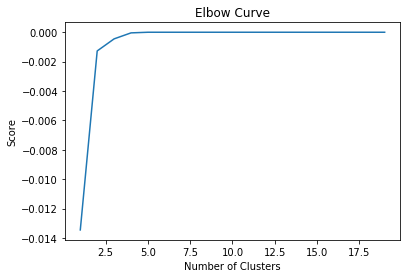

In [137]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [134]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [135]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.0725651 ]
 [0.01844721]
 [0.03657347]]


In [136]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1])

Felzenszwalb number of segments: 194
SLIC number of segments: 190
Quickshift number of segments: 695


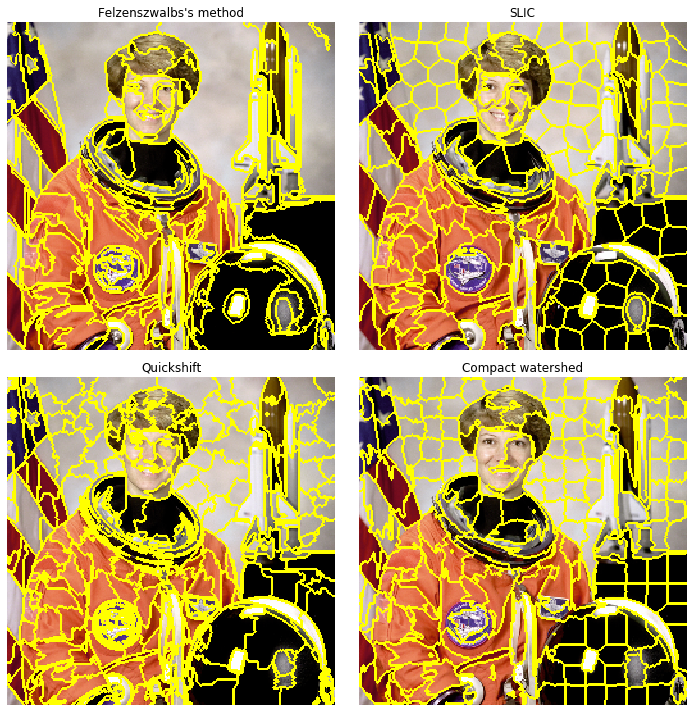

In [139]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

https://scihub.copernicus.eu/dhus/#/home